In [90]:
import pandas as pd          
import numpy as np          # For mathematical calculations
import matplotlib.pyplot as plt  # For plotting graphs
from datetime import datetime    # To access datetime
from pandas import Series        # To work on series
import matplotlib
import warnings                   # To ignore the warnings
warnings.filterwarnings("ignore")
from math import sqrt
from sklearn.metrics import mean_squared_error
from numpy import array

In [91]:
df = pd.read_excel('Talcher_data.xlsx')
df = df.drop(['To Date', 'Unnamed: 0'],axis = 1)
df.head()

,From Date,PM10,PM2.5,WS,WD,AT,RH
0,01-01-2018 00:00,NaN,NaN,NaN,NaN,NaN,NaN
1,01-01-2018 00:15,NaN,NaN,NaN,NaN,NaN,NaN
2,01-01-2018 00:30,NaN,NaN,NaN,NaN,NaN,NaN
3,01-01-2018 00:45,NaN,NaN,NaN,NaN,NaN,NaN
4,01-01-2018 01:00,NaN,NaN,NaN,NaN,NaN,NaN


In [92]:
df.dtypes


From Date     object
PM10         float64
PM2.5        float64
WS           float64
WD           float64
AT           float64
RH           float64
dtype: object

In [93]:
df.reset_index(inplace = True)
df = df.drop(['index'], axis = 1)
df['From Date'] = pd.to_datetime(df['From Date'])
df['From Date'] = pd.to_datetime(df['From Date'])


df.dtypes
df.head()

,From Date,PM10,PM2.5,WS,WD,AT,RH
0,2018-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN
1,2018-01-01 00:15:00,NaN,NaN,NaN,NaN,NaN,NaN
2,2018-01-01 00:30:00,NaN,NaN,NaN,NaN,NaN,NaN
3,2018-01-01 00:45:00,NaN,NaN,NaN,NaN,NaN,NaN
4,2018-01-01 01:00:00,NaN,NaN,NaN,NaN,NaN,NaN


In [94]:
#Set the date as Index
df = df.set_index(df['From Date'],drop = True)
df = df.sort_index()

#Take the mean of each day 
df = df.resample('d').mean()
df.head()
#Removing the outlier
df = df['2018-01':'2020-02']
df_ospcb = df.copy()

df_ospcb.head()

,PM10,PM2.5,WS,WD,AT,RH
From Date,,,,,,
2018-01-01,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-02,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-03,379.369643,195.931398,2.707553,144.437128,27.276702,44.332021
2018-01-04,125.772317,77.229048,2.362824,212.756588,27.790706,64.956118
2018-01-05,76.147460,45.540000,2.831786,199.232619,27.070357,66.933810


In [95]:
date_series = df_ospcb.index
date_series

DatetimeIndex(['2018-01-01', '2018-01-02', '2018-01-03', '2018-01-04',
               '2018-01-05', '2018-01-06', '2018-01-07', '2018-01-08',
               '2018-01-09', '2018-01-10',
               ...
               '2020-02-20', '2020-02-21', '2020-02-22', '2020-02-23',
               '2020-02-24', '2020-02-25', '2020-02-26', '2020-02-27',
               '2020-02-28', '2020-02-29'],
              dtype='datetime64[ns]', name='From Date', length=790, freq='D')

In [96]:
print(df_ospcb.columns)

Index(['PM10', 'PM2.5', 'WS', 'WD', 'AT', 'RH'], dtype='object')


In [97]:
from sklearn.impute import KNNImputer

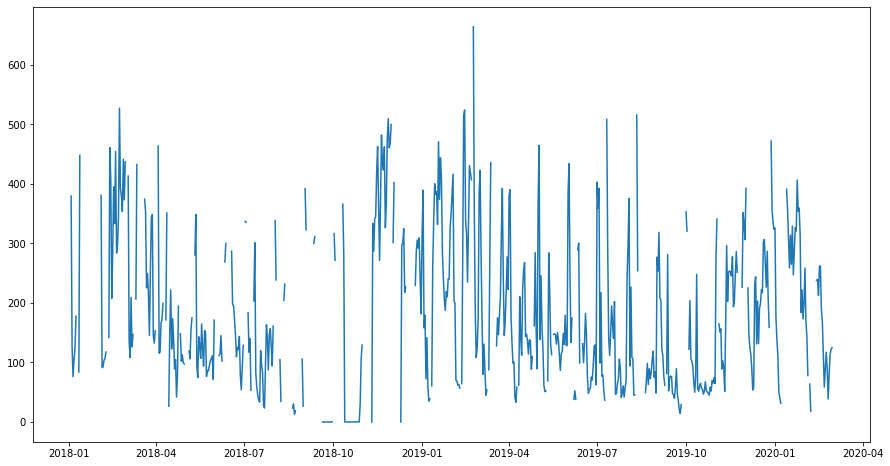

In [98]:
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15,8

plt.plot(df_ospcb['PM10'])

In [99]:
# imputer = KNNImputer(n_neighbors=200, weights='distance')
# df_ospcb_imputed_knn = imputer.fit_transform(df_ospcb)
from fancyimpute import IterativeImputer
mice_imputer = IterativeImputer()
df_ospcb_imputed_knn =  mice_imputer.fit_transform(df_ospcb)

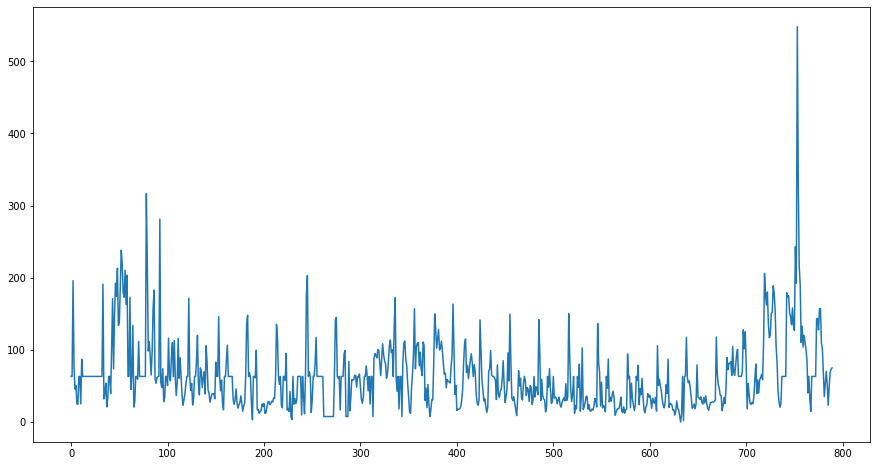

In [100]:
plt.plot(df_ospcb_imputed_knn[:, 1])

In [101]:
df_ospcb_after_impute = pd.DataFrame(data = df_ospcb_imputed_knn, columns = df_ospcb.columns)
df_ospcb_after_impute.head()

,PM10,PM2.5,WS,WD,AT,RH
0,179.122486,63.247834,2.693569,177.778029,27.906130,71.062734
1,179.122486,63.247834,2.693569,177.778029,27.906130,71.062734
2,379.369643,195.931398,2.707553,144.437128,27.276702,44.332021
3,125.772317,77.229048,2.362824,212.756588,27.790706,64.956118
4,76.147460,45.540000,2.831786,199.232619,27.070357,66.933810


In [102]:
df_ospcb_after_impute['Date'] = date_series
df_ospcb_after_impute.head()

,PM10,PM2.5,WS,WD,AT,RH,Date
0,179.122486,63.247834,2.693569,177.778029,27.906130,71.062734,2018-01-01
1,179.122486,63.247834,2.693569,177.778029,27.906130,71.062734,2018-01-02
2,379.369643,195.931398,2.707553,144.437128,27.276702,44.332021,2018-01-03
3,125.772317,77.229048,2.362824,212.756588,27.790706,64.956118,2018-01-04
4,76.147460,45.540000,2.831786,199.232619,27.070357,66.933810,2018-01-05


In [103]:
#Set the date as Index
df_ospcb_after_impute = df_ospcb_after_impute.set_index(df_ospcb_after_impute['Date'], drop = True)
df_ospcb_after_impute = df_ospcb_after_impute.sort_index()
df_ospcb_after_impute.head()

,PM10,PM2.5,WS,WD,AT,RH,Date
Date,,,,,,,
2018-01-01,179.122486,63.247834,2.693569,177.778029,27.906130,71.062734,2018-01-01
2018-01-02,179.122486,63.247834,2.693569,177.778029,27.906130,71.062734,2018-01-02
2018-01-03,379.369643,195.931398,2.707553,144.437128,27.276702,44.332021,2018-01-03
2018-01-04,125.772317,77.229048,2.362824,212.756588,27.790706,64.956118,2018-01-04
2018-01-05,76.147460,45.540000,2.831786,199.232619,27.070357,66.933810,2018-01-05


In [104]:
df_ospcb_after_impute = df_ospcb_after_impute.drop(['Date'], axis = 1)
df_ospcb_after_impute.head()

,PM10,PM2.5,WS,WD,AT,RH
Date,,,,,,
2018-01-01,179.122486,63.247834,2.693569,177.778029,27.906130,71.062734
2018-01-02,179.122486,63.247834,2.693569,177.778029,27.906130,71.062734
2018-01-03,379.369643,195.931398,2.707553,144.437128,27.276702,44.332021
2018-01-04,125.772317,77.229048,2.362824,212.756588,27.790706,64.956118
2018-01-05,76.147460,45.540000,2.831786,199.232619,27.070357,66.933810


In [105]:
df_index_list = df_ospcb_after_impute.index.values
years = pd.DatetimeIndex(df_index_list)
list_year = years.year
list_month = years.month
list_day = years.day
list_dayOfWeek = years.dayofweek
df_ospcb_after_impute['year'] = list_year 
df_ospcb_after_impute['month'] = list_month 
df_ospcb_after_impute['day'] = list_day
df_ospcb_after_impute['day_of_week'] = list_dayOfWeek

#Determining Weekend
def weekend(row):
   if (row == 5) or (row == 6):
       return 1
   else:
       return 0

df_ospcb_after_impute['weekend'] = df_ospcb_after_impute['day_of_week'].apply(weekend)
df_ospcb_after_impute.head()

,PM10,PM2.5,WS,WD,AT,RH,year,month,day,day_of_week,weekend
Date,,,,,,,,,,,
2018-01-01,179.122486,63.247834,2.693569,177.778029,27.906130,71.062734,2018,1,1,0,0
2018-01-02,179.122486,63.247834,2.693569,177.778029,27.906130,71.062734,2018,1,2,1,0
2018-01-03,379.369643,195.931398,2.707553,144.437128,27.276702,44.332021,2018,1,3,2,0
2018-01-04,125.772317,77.229048,2.362824,212.756588,27.790706,64.956118,2018,1,4,3,0
2018-01-05,76.147460,45.540000,2.831786,199.232619,27.070357,66.933810,2018,1,5,4,0


In [106]:
corr_mat = df_ospcb_after_impute.corr(method = 'pearson')
print(corr_mat)

                 PM10     PM2.5        WS  ...       day  day_of_week   weekend
PM10         1.000000  0.725270  0.265582  ... -0.092373    -0.024677 -0.016577
PM2.5        0.725270  1.000000  0.423157  ... -0.019651    -0.024332 -0.016295
WS           0.265582  0.423157  1.000000  ... -0.006061    -0.009237 -0.015283
WD          -0.462394 -0.379969 -0.218815  ...  0.008139     0.008714  0.006015
AT          -0.441385 -0.552761 -0.312727  ...  0.003355    -0.001668  0.005197
RH          -0.471728 -0.439324 -0.043382  ...  0.064384     0.004621 -0.013640
year         0.008346  0.054597  0.314965  ... -0.003916     0.003902 -0.000598
month       -0.123705 -0.176090 -0.065041  ...  0.012298     0.003619  0.009268
day         -0.092373 -0.019651 -0.006061  ...  1.000000    -0.003235 -0.009140
day_of_week -0.024677 -0.024332 -0.009237  ... -0.003235     1.000000  0.789942
weekend     -0.016577 -0.016295 -0.015283  ... -0.009140     0.789942  1.000000

[11 rows x 11 columns]


In [107]:
corr_mat.to_excel("correlation_matrix.xlsx")

In [108]:
mean_ospcb = df_ospcb_after_impute['PM2.5'].min()
std_dev_ospcb = df_ospcb_after_impute['PM2.5'].max() - df_ospcb_after_impute['PM2.5'].min()

cols = ['PM10','PM2.5','WS','WD','AT','RH','year','month','day','day_of_week','weekend']
for field in ['PM10','PM2.5','WS','WD','AT','RH']:    
   df_ospcb_after_impute[field][df_ospcb_after_impute[field] > (df_ospcb_after_impute[field].mean() + 1.5*df_ospcb_after_impute[field].std())] = np.nan


In [109]:
for field in cols:
   print(field, df_ospcb_after_impute[field].isna().sum())

PM10 80
PM2.5 63
WS 70
WD 65
AT 52
RH 46
year 0
month 0
day 0
day_of_week 0
weekend 0


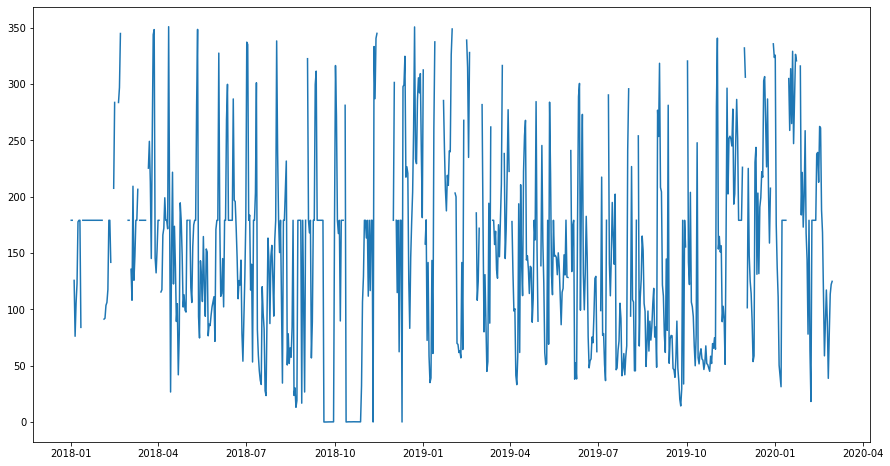

In [110]:
plt.plot(df_ospcb_after_impute['PM10'])

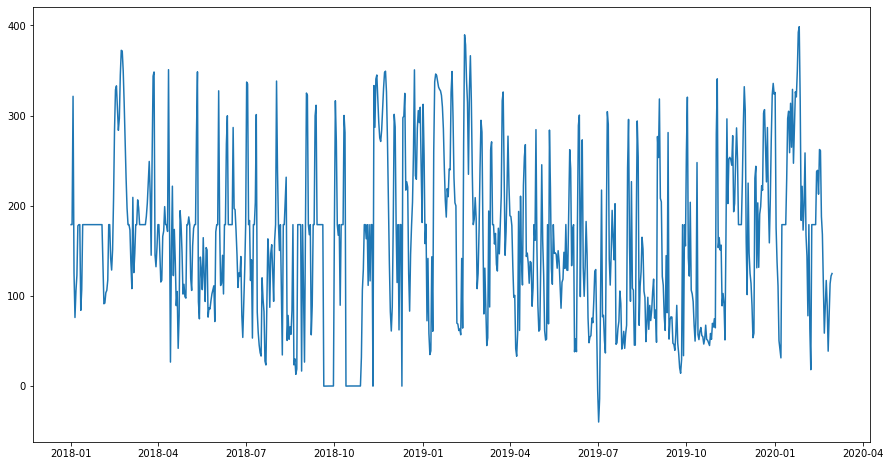

In [111]:
for field in ['PM10','PM2.5','WS','WD','AT','RH']:
   df_ospcb_after_impute[field] = df_ospcb_after_impute[field].interpolate(method = 'spline', order = 3)
plt.plot(df_ospcb_after_impute['PM10'])

In [112]:
for field in cols:
   print(field, df_ospcb_after_impute[field].isna().sum())

PM10 0
PM2.5 0
WS 0
WD 0
AT 0
RH 0
year 0
month 0
day 0
day_of_week 0
weekend 0


In [113]:
  #df_ospcb_after_impute =  df_ospcb_after_impute.iloc[1:,:]
  df_ospcb_after_impute.head()

,PM10,PM2.5,WS,WD,AT,RH,year,month,day,day_of_week,weekend
Date,,,,,,,,,,,
2018-01-01,179.122486,63.247834,2.693569,177.778029,27.906130,71.062734,2018,1,1,0,0
2018-01-02,179.122486,63.247834,2.693569,177.778029,27.906130,71.062734,2018,1,2,1,0
2018-01-03,321.446234,80.593500,2.707553,144.437128,27.276702,44.332021,2018,1,3,2,0
2018-01-04,125.772317,77.229048,2.362824,212.756588,27.790706,64.956118,2018,1,4,3,0
2018-01-05,76.147460,45.540000,2.831786,199.232619,27.070357,66.933810,2018,1,5,4,0


In [114]:
cols = ['PM10','PM2.5','WS','WD','AT','RH','year','month','day','day_of_week','weekend']
for field in cols:
   df_ospcb_after_impute[field] = (df_ospcb_after_impute[field] - df_ospcb_after_impute[field].min())/(df_ospcb_after_impute[field].max() - df_ospcb_after_impute[field].min())

df_ospcb_after_impute = df_ospcb_after_impute[['WS','PM10','WD','AT','RH','year','month','day','day_of_week','weekend','PM2.5']]
df_ospcb_after_impute.head()

,WS,PM10,WD,AT,RH,year,month,day,day_of_week,weekend,PM2.5
Date,,,,,,,,,,,
2018-01-01,0.717080,0.499297,0.521603,0.784086,0.695355,0.0,0.0,0.000000,0.000000,0.0,0.372875
2018-01-02,0.717080,0.499297,0.521603,0.784086,0.695355,0.0,0.0,0.033333,0.166667,0.0,0.372875
2018-01-03,0.725250,0.823916,0.273500,0.745604,0.326286,0.0,0.0,0.066667,0.333333,0.0,0.475208
2018-01-04,0.523866,0.377614,0.781892,0.777029,0.611041,0.0,0.0,0.100000,0.500000,0.0,0.455359
2018-01-05,0.797824,0.264427,0.681255,0.732988,0.638347,0.0,0.0,0.133333,0.666667,0.0,0.268405


In [115]:
def split_sequences(sequences, n_steps_in, n_steps_out):
	X, y = list(), list()
	for i in range(len(sequences)):
		# find the end of this pattern
		end_ix = i + n_steps_in
		out_end_ix = end_ix + n_steps_out-1
		# check if we are beyond the dataset
		if out_end_ix > len(sequences):
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequences[i:end_ix, :-1], sequences[end_ix-1:out_end_ix, -1]
		X.append(seq_x)
		y.append(seq_y)
	return array(X), array(y)


# choose a number of time steps
n_steps_in, n_steps_out = 15, 4

X, y = split_sequences(df_ospcb_after_impute.values, n_steps_in, n_steps_out)

X_test, y_test = X[-1], y[-1]

for i in range(n_steps_out):
	X = np.delete(X, X.shape[0] - 1, 0)
	y = np.delete(y, y.shape[0] - 1, 0)

n_features = X.shape[2]
X_svr = X[:,:,0]

In [116]:
from sklearn.multioutput import MultiOutputRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

# regr_multirf = MultiOutputRegressor(SVR(kernel='rbf'))

regr_multirf = MultiOutputRegressor(estimator=SVR(C = 12.0, cache_size=200, coef0=0.0, degree=5,
                                   epsilon=0.05, gamma= 'scale', kernel='rbf',
                                   max_iter=-1, shrinking=True, tol=0.001,
                                   verbose=False), n_jobs=None)
regr_multirf.fit(X_svr, y)

MultiOutputRegressor(estimator=SVR(C=12.0, cache_size=200, coef0=0.0, degree=5,
                                   epsilon=0.05, gamma='scale', kernel='rbf',
                                   max_iter=-1, shrinking=True, tol=0.001,
                                   verbose=False),
                     n_jobs=None)

In [117]:
X_test.shape

(15, 10)

In [118]:
X_test = X_test.reshape((1, n_steps_in, n_features))
X_test_new = X_test[:,:,0]
yhat = regr_multirf.predict(X_test_new)

In [119]:
print(X_test_new.shape)
print(yhat.shape)

(1, 15)
(1, 4)


In [120]:
print(yhat.shape)
print(y_test.shape)

(1, 4)
(4,)


In [121]:
X.shape

(769, 15, 10)

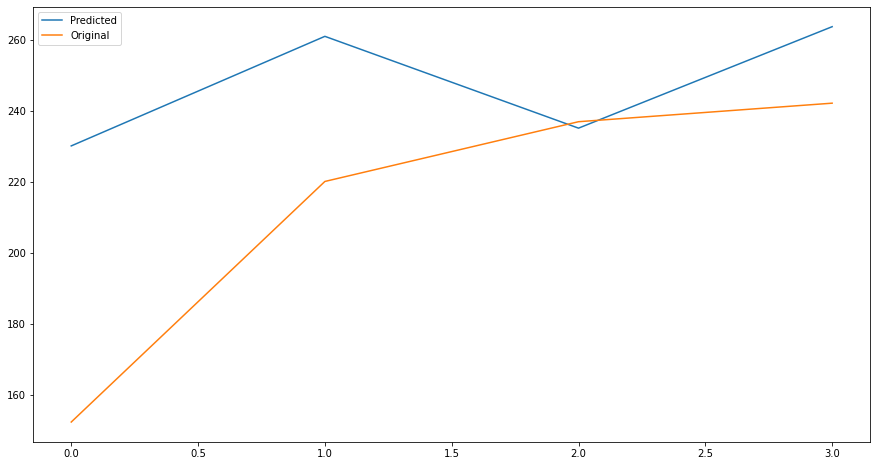

In [122]:
#Setting default Plot Size
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15,8

# fig, ax = plt.subplots()
plt.plot((yhat[0]*std_dev_ospcb)+mean_ospcb, label = 'Predicted')
plt.plot((y_test*std_dev_ospcb)+mean_ospcb, label = 'Original')
plt.legend()
plt.show()

In [123]:
x_ann = []
counter = 0
for inp_val in X:
 x_input_ann = inp_val.reshape((1, n_steps_in,n_features))
 x_input_ann = x_input_ann[:,:,0]
 y_newpred = regr_multirf.predict(x_input_ann)
 x_ann.append(y_newpred)
 counter = counter + 1
 #print(counter)

x_ann = array(x_ann)

In [124]:
x_ann_new = x_ann[:, 0, :]
x_ann_new.shape
x_ann_new = x_ann_new.reshape(x_ann_new.shape[0], x_ann_new.shape[1], -1)
y_new = y.reshape(y.shape[0], y.shape[1], -1)

In [125]:
from numpy import array
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import RepeatVector
from keras.layers import TimeDistributed
from keras.utils import plot_model
import matplotlib.pyplot as plt
from datetime import datetime
from tensorflow.keras.callbacks import EarlyStopping
from keras.layers import Bidirectional
from keras.layers import GRU

In [126]:
model_auto = Sequential()
model_auto.add(Bidirectional(GRU(100, activation='relu', input_shape=(x_ann_new.shape[1], x_ann_new.shape[2]),return_sequences=True)))
model_auto.add(Bidirectional(GRU(50, activation='relu', return_sequences=True)))
model_auto.add(Bidirectional(GRU(10, activation='relu')))
model_auto.add(RepeatVector(x_ann_new.shape[1]))
model_auto.add(Bidirectional(GRU(100, activation='relu', return_sequences=True)))
model_auto.add(Bidirectional(GRU(50, activation='relu', return_sequences=True)))
model_auto.add(Bidirectional(GRU(10, activation='relu', return_sequences=True)))
model_auto.add(TimeDistributed(Dense(1)))
model_auto.compile(optimizer='adam', loss='mse')

In [127]:
monitor = EarlyStopping(monitor='loss', min_delta=1e-3, patience=50, verbose=1, mode='auto',
       restore_best_weights=True)
model_auto.fit(x_ann_new, y_new, callbacks=[monitor], validation_split = 0.1, verbose=1, epochs=2000)
#model_auto.save('Auto_improv.h5')

Train on 692 samples, validate on 77 samples
Epoch 1/2000
692/692 [==============================] - 9s 13ms/step - loss: 0.0634 - val_loss: 0.0574
Epoch 2/2000
692/692 [==============================] - 1s 2ms/step - loss: 0.0240 - val_loss: 0.0358
Epoch 3/2000
692/692 [==============================] - 1s 2ms/step - loss: 0.0166 - val_loss: 0.0156
Epoch 4/2000
692/692 [==============================] - 1s 2ms/step - loss: 0.0144 - val_loss: 0.0145
Epoch 5/2000
692/692 [==============================] - 1s 2ms/step - loss: 0.0138 - val_loss: 0.0144
Epoch 6/2000
692/692 [==============================] - 1s 2ms/step - loss: 0.0135 - val_loss: 0.0115
Epoch 7/2000
692/692 [==============================] - 1s 2ms/step - loss: 0.0133 - val_loss: 0.0113
Epoch 8/2000
692/692 [==============================] - 1s 2ms/step - loss: 0.0126 - val_loss: 0.0096
Epoch 9/2000
692/692 [==============================] - 1s 2ms/step - loss: 0.0107 - val_loss: 0.0049
Epoch 10/2000
692/692 [=============

In [128]:
y_test_new = y_test.reshape(y_test.shape[0], -1)


In [129]:
y_test_new = y_test_new.T
y_test_new = y_test_new.reshape(y_test_new.shape[0], y_test_new.shape[1], -1)
print(y_test_new.shape)
x_ann_new_input = array(y_test_new)
yhat_new = model_auto.predict(x_ann_new_input, verbose=1)


(1, 4, 1)
1/1 [==============================] - 1s 584ms/step


In [130]:
print(yhat_new.shape)
print(y_test_new.shape)


(1, 4, 1)
(1, 4, 1)


In [131]:
y_test_new_actual = (y_test_new[0]*std_dev_ospcb)+mean_ospcb
yhat_predicted = (yhat_new[0]*std_dev_ospcb)+mean_ospcb


In [132]:
print(yhat_predicted)
print(y_test_new_actual)


[[169.84203]
 [215.42387]
 [255.53839]
 [250.1868 ]]
[[152.24030004]
 [220.05767454]
 [236.89974901]
 [242.12529146]]


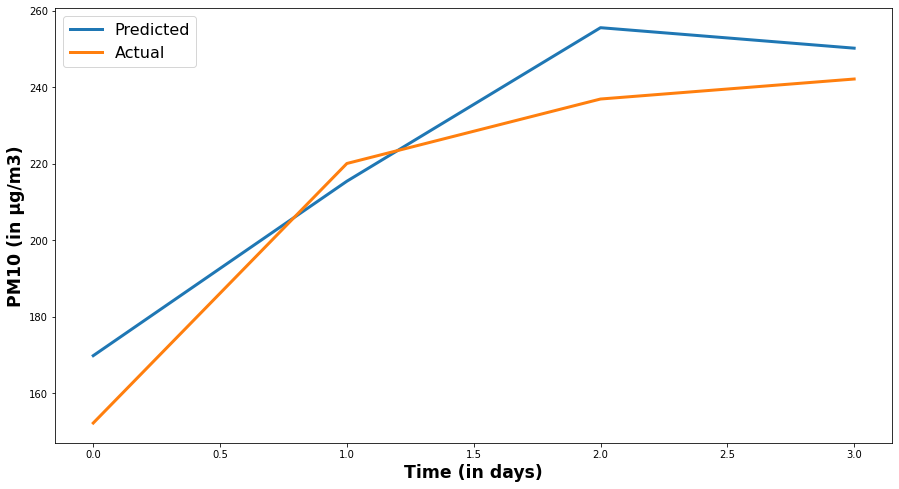

In [133]:
plt.plot((yhat_predicted),label = 'Predicted', linewidth = 3)
plt.plot((y_test_new_actual), label = 'Actual', linewidth = 3)
plt.xlabel('Time (in days)', fontsize = 'xx-large', fontweight = 'bold')
plt.ylabel('PM10 (in µg/m3)', fontsize = 'xx-large', fontweight = 'bold')
plt.legend(prop = {'size': 16})
plt.show()

In [134]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from math import sqrt
def mean_absolute_percentage_error(y_true, y_pred): 
   return np.mean(np.abs((y_true - y_pred) / y_true)) * 100


rms_new = sqrt(mean_squared_error(y_test_new_actual, yhat_predicted))
print(rms_new)

mse_new = mean_squared_error(y_test_new_actual, yhat_predicted)
print(mse_new)

mae_new = mean_absolute_error(y_test_new_actual, yhat_predicted)
print(mae_new)

mape_new = mean_absolute_percentage_error(y_test_new_actual, yhat_predicted)
print(mape_new)

13.635245920309083
185.91993130730552
12.233918773355278
6.216184175396105
